In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#definir objeto fasor
class Fasor():
    def __init__(self,name="phasor",color="purple"):
        self.color=color
        self.name=name
        self.x=0
        self.y=0
        self.angle=0
        self.r=0
        self.i=0
        self.v=0
    def __str__(self):
        return "x={0},y={1},r={2},θ={3}".format(round(self.x,4),round(self.y,4),round(self.r,4),round(self.angle,4))
    def set_x(self,x):
        self.x=x
        self.cart_2_polar()
    def set_y(self,y):
        self.y=y
        self.cart_2_polar()
    def set_angle(self,angle):
        self.angle=angle
        self.polar_2_cart()
    def set_r(self,r):
        self.r=abs(r)
        self.polar_2_cart() 
        
    def set_color(self,color_str):
        self.color=color_str
    def set_name(self,name):
        self.name=name
    #Devolver función en el dominio del tiempo
    def sin_f(self,rad_series):#recibe una serie de angulos en radianes
        return self.crest*np.sin(rad_series+(self.angle*np.pi/180))
    #Conversion de sistema coordenado
    def polar_2_cart(self):
        self.x=self.r*np.cos(self.angle*(np.pi/180))
        self.y=self.r*np.sin(self.angle*(np.pi/180))#aquí vienen a morir todas las instrucciones de cambio de sist. coord aún cuando se tenga que redefinir x y y
        self.crest=self.r*(2**0.5)

    def cart_2_polar(self):
        if (round(self.x,3)==0) & (round(self.y,3)==0):
            self.r=0
            self.angle=0
        else:
            self.r=(self.x**2+self.y**2)**0.5
            if round(self.x,3)!=0:
                if self.x>0:
                    self.angle=np.arctan(self.y/self.x)*(180/np.pi)
                else:
                    self.angle=np.arctan(self.y/self.x)*(180/np.pi)+180
            else:
                if self.y>0:
                    self.angle=90
                else:
                    self.angle=-90
        self.crest=self.r*(2**0.5)
    #operator overloading
    #multiplicación de fasores
    def __mul__(self,fasor):#otro objeto fasor
        self.cart_2_polar()
        angle=self.angle+fasor.angle
        r=self.r*fasor.r
        kid=Fasor()
        kid.set_angle(angle)
        kid.set_r(r)
        kid.polar_2_cart()
        return kid
    # divisón de fasores
    def __truediv__(self,fasor):#otro objeto fasor
        self.cart_2_polar()
        angle=self.angle-fasor.angle
        r=self.r/fasor.r
        kid=Fasor()
        kid.set_angle(angle)
        kid.set_r(r)
        kid.polar_2_cart()
        return kid
    #suma de fasores
    def __add__(self,fasor):
        self.polar_2_cart()
        x=self.x+fasor.x
        y=self.y+fasor.y
        kid=Fasor()
        kid.set_x(x)
        kid.set_y(y)
        kid.cart_2_polar()
        return kid
    def __sub__(self,fasor):
        self.polar_2_cart()
        x=self.x-fasor.x
        y=self.y-fasor.y
        kid=Fasor()
        kid.set_x(x)
        kid.set_y(y)
        kid.cart_2_polar()
        return kid
    
    #graficar diagrama fasorial o multiples fasores en una sola gráfica
    def graph(self,phasor_list=[],title="Phasor diagram"):
        #crear lista toal de objetos a graficar
        obj_list=[self]
        obj_list+=phasor_list
        #definir limite de la gráfica mediante máx r
        lim=max([phasor.r for phasor in obj_list])*2
        #limpiar gráfica y insertar lo básico
        plt.clf()
        fig, ax = plt.subplots(figsize=(9,9))
        ax.set_xlim(-lim,lim)
        ax.set_ylim(-lim,lim)
        plt.axhline(color="black", linestyle="--",linewidth=1)
        plt.axvline(color="k",linestyle="--",linewidth=1)
        ax.grid(color='darkgrey', linestyle='--', linewidth=0.7)
        ax.set_title(title,fontsize=14,weight="bold",family="fantasy")
        #graficar cada número imaginario

        for phasor in obj_list:
            string=f"{phasor.name},{round(phasor.x,3)}+j{round(phasor.y,3)},θ={round(phasor.angle,3)},R={round(phasor.r,3)}"
            ax.arrow(0, 0, phasor.x, phasor.y,width=phasor.r*0.03,length_includes_head=True, head_width=phasor.r*0.1,
                           head_length=phasor.r*0.1, fc=phasor.color, ec='k')


            #ax.text(phasor.x*1.06,phasor.y*1.06,f"{round(phasor.x,3)}+j{round(phasor.y,3)}",fontsize=10,weight="bold",family="fantasy",
            #       style='italic', bbox={'facecolor': phasor.color, 'alpha': 0.65, 'pad': 0.9})

            #ax.text(phasor.x*0.2,phasor.y*0.2,f"θ={round(phasor.angle,3)}",fontsize=10,weight="bold",family="fantasy",
            #       style='italic',bbox={'facecolor': phasor.color, 'alpha': 0.65, 'pad': 0.9})

            #ax.text(phasor.x*0.53,phasor.y*0.53,f"R={round(phasor.r,3)}",fontsize=10,weight="bold",family="fantasy",
            #       style='italic',bbox={'facecolor': phasor.color, 'alpha': 0.65, 'pad': 0.9})

            ax.text(phasor.x*2.5,phasor.y*2.5,string,fontsize=11.3,weight="bold",family="fantasy",
                   style='italic',color="w",bbox={'facecolor': phasor.color, 'alpha': 0.69, 'pad': 0.9},rotation=phasor.angle)
        

        plt.show()
    #graficar en domio del tiempo
    def graph_sin_f(self,phasor_list=[],lims=(2,2),ylabel="Volts"):
        domain_series=np.linspace(-lims[0]*np.pi,lims[1]*np.pi,300)
        #crear lista toal de objetos a graficar
        obj_list=[self]
        obj_list+=phasor_list
        #limpiar gráfica y insertar lo básico
        plt.clf()
        fig, ax = plt.subplots(figsize=(9,9))
        plt.axhline(color="black", linestyle="--",linewidth=1)
        plt.axvline(color="k",linestyle="--",linewidth=1)
        ax.grid(color='darkgrey', linestyle='--', linewidth=0.7)
        ax.set_title("Sin waves on time domain",fontsize=14,weight="bold",family="fantasy")
        ax.set_xticks(np.arange(domain_series[0],domain_series[-1],np.pi/2))
        ax.set_ylabel(ylabel,fontsize=10)
        ax.set_xlabel("Radians",fontsize=10)
        #plotear
        for phasor in obj_list:
            ax.plot(domain_series,phasor.sin_f(domain_series),color=phasor.color,label=phasor.name)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [3]:
#grados a radiananes
def deg_2_rad(deg):
    return round(deg*np.pi/180,2)
def rad_2_deg(rad):
    return round(rad*180/np.pi,2)

In [4]:

#función que calcula impedancia inductiva
def XL(f,l):
    result=np.pi*2*f*l
    return result
#función que calcula impedancia capacitiva
def XC(f,c):
    result=1/(np.pi*2*f*c)
    return result

### I y V en cada elemento!
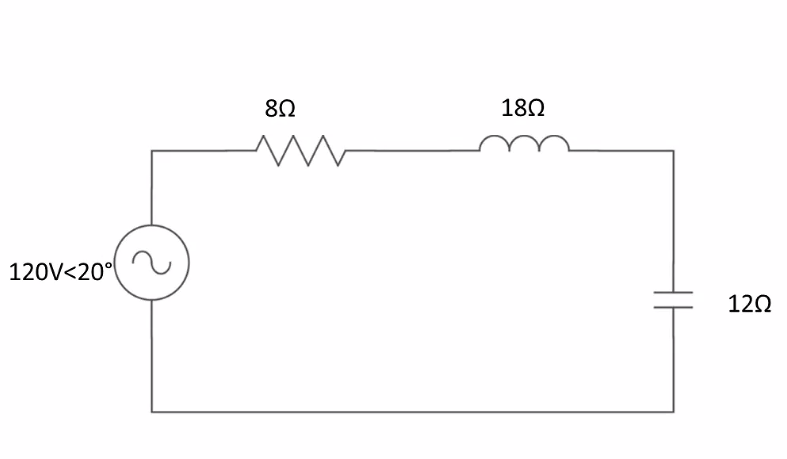
### francisco.mata_s@ucr.ac.cr


In [5]:
#definir elementos con los datos dados
#voltaje
v=Fasor()
v.set_r(120)
v.set_angle(20)
#resistencia 
res=Fasor()
res.set_r(8)
res.set_angle(0)
#inductor
ind=Fasor()
ind.set_r(18)
ind.set_angle(90)
#capacitor
cap=Fasor()
cap.set_r(12)
cap.set_angle(-90)

In [7]:
#DETERMINE I
#determinar impedancia equivalente
zeq=res+cap+ind
print(zeq)
#determinar corriente
i=v/zeq
i.set_name("I")
i.set_color("magenta")
print(i)


x=8.0,y=6.0,r=10.0,θ=36.8699
x=11.4836,y=-3.4824,r=12.0,θ=-16.8699


In [8]:
#Determine VR en forma fasorial
res_v=i*res
print(f"VR tiene los siguientes valores", res_v)
#Determine VL en forma fasorial
ind_v=i*ind
print(f"VR tiene los siguientes valores", ind_v)
#Determine VC en forma fasorial
cap_v=i*cap
print(f"VR tiene los siguientes valores", cap_v)

VR tiene los siguientes valores x=91.8688,y=-27.8591,r=96.0,θ=-16.8699
VR tiene los siguientes valores x=62.6831,y=206.7047,r=216.0,θ=73.1301
VR tiene los siguientes valores x=-41.7887,y=-137.8031,r=144.0,θ=-106.8699


<Figure size 432x288 with 0 Axes>

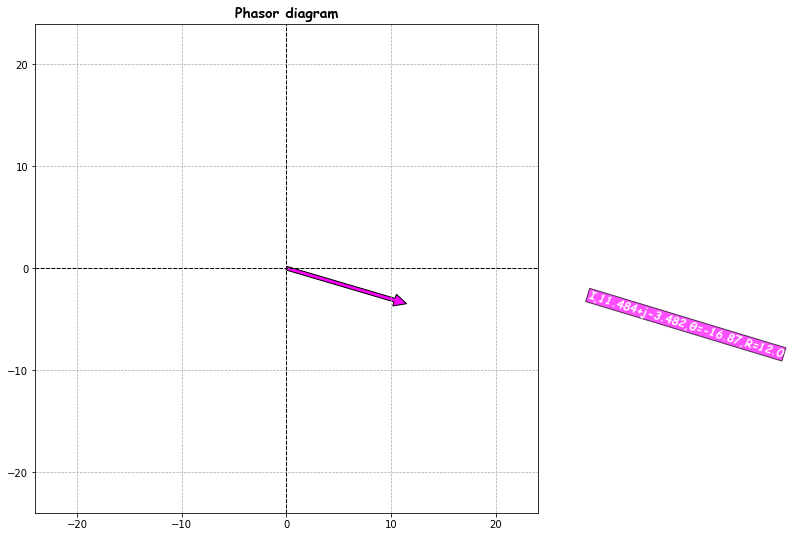

<Figure size 432x288 with 0 Axes>

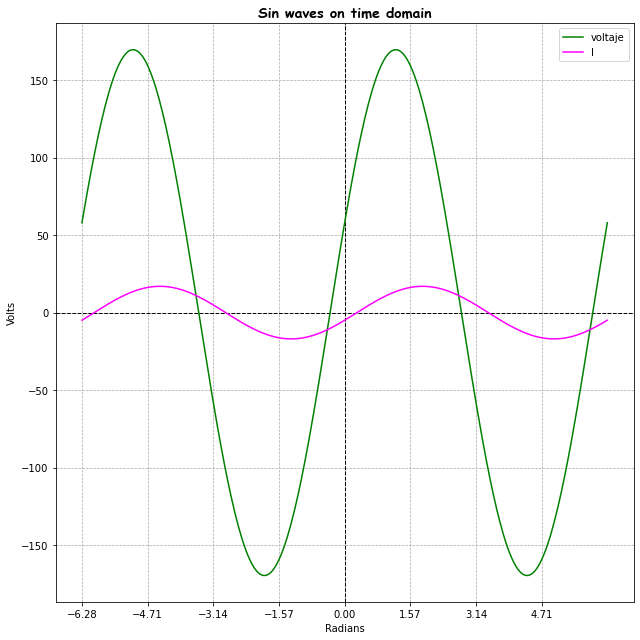

In [11]:
#graficas
v.set_name("voltaje")
v.set_color("g")
#graficar fasor de I
i.graph()
#graficar v e i en domio teimpo
v.graph_sin_f([i])